In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random
import os

In [ ]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

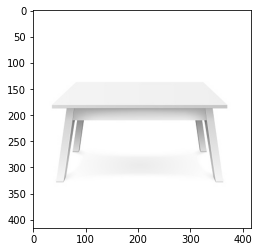

In [ ]:
i = cv2.imread('/content/1.jpg')
plt.imshow(i)

In [ ]:
'''
1---[130:330, 30:370, :]
2---[25:580, 20:600, :]
3---[8:203, 33:200, :]
4---
5---[400:1000, 300:1100, :]
6---[55:115, 20:100, :]
7---[55:202, 78:145,:]
8---[78:360, 65:545,:]
###9---[12:265, 65:165, :]
10---[12:265, 65:165, :]
11---[55:540, 120:480]
'''

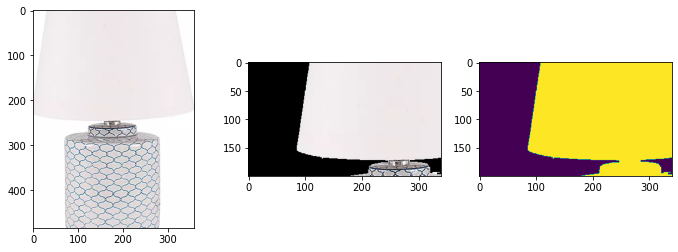

(600, 600, 3)

In [ ]:
def process(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_canny = cv2.Canny(img_gray, 0, 50)
    img_dilate = cv2.dilate(img_canny, None, iterations=1)
    img_erode = cv2.erode(img_dilate, None, iterations=1)
    return img_erode

def get_masked(img):
    h, w, _ = img.shape
    center = h // 2, w // 2
    contours, _ = cv2.findContours(process(img), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        if cv2.contourArea(cnt) > 100:
            if cv2.pointPolygonTest(cnt, center, False) > 0:
                mask = np.zeros((h, w), 'uint8')
                cv2.drawContours(mask, [cnt], -1, 255, -1)
                m = mask
                return cv2.bitwise_and(img, img, mask=mask), m

p = "/content/11.jpg"
i = cv2.imread(p)[:,:,::-1]
f, m = get_masked(i)
plt.figure(figsize=(20,4))
plt.subplot(1,5,1),plt.imshow(i[55:540, 120:480])
plt.subplot(1,5,2),plt.imshow(f[130:330, 30:370, :])
plt.subplot(1,5,3),plt.imshow(m[130:330, 30:370])
plt.show()

#m = image_resize(m, width = 30)
#i = image_resize(i, width = 30)
cv2.imwrite('mask.jpg', m)
#cv2.imwrite('i1.jpg', i)
i.shape

(20, 15, 3)
8 12


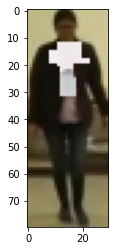

In [ ]:
s_img = cv2.imread(p)[:,:,::-1]
s_img=s_img[55:540, 120:480]
s_img = image_resize(s_img, width = 15)
#s_img = image_resize(s_img, height = 30)
#plt.imshow(s_img)
l_img = cv2.imread("/content/0.jpg")[:,:,::-1]
mask   = cv2.imread('/content/mask.jpg')
mask=mask[55:540, 120:480]
mask = image_resize(mask, width = 15)
#mask = image_resize(mask, height = 30)
kernel = np.ones((3,3),np.uint8)
mask = cv2.erode(mask, kernel,iterations = 2)

print(mask.shape)

#l_img[mask>0]=0 
y_offset=random.choice(range(10,60))
x_offset=random.choice(range(0, 15))
print(x_offset,y_offset)
l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]][mask>0] = 0

l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] += s_img*(mask>0)

plt.imshow(l_img)

In [ ]:
lis = os.listdir('/content/drive/MyDrive/Final/partial_dataset/OccludedREID/gallery')
lis = np.array(lis)
np.random.shuffle(lis)
#lis.sort()
lis.shape

(1000,)

In [ ]:
lis[0]

'146_04.jpg'

In [ ]:
data=[]
c=0
for i in lis:
    image = cv2.imread("/content/drive/MyDrive/Final/partial_dataset/OccludedREID/gallery/"+ i)
    c+=1
    print(c)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    re = cv2.resize(image, (30, 80), interpolation = cv2.INTER_AREA)
    #re = cv2.cvtColor(re,cv2.COLOR_BGR2RGB)
    #plt.figure(figsize=(20,4))
    #plt.subplot(1,4,1),plt.imshow(image)
    #plt.subplot(1,4,2),plt.imshow(re)
    #plt.show()
    #path = '/content/drive/MyDrive/Dataset/Pre_data_fcase'
    #cv2.imwrite(os.path.join(path , i), cv2.cvtColor(re,cv2.COLOR_BGR2RGB))
    data.append(re)

data=np.array(data)
data.shape

In [ ]:
c=800

901


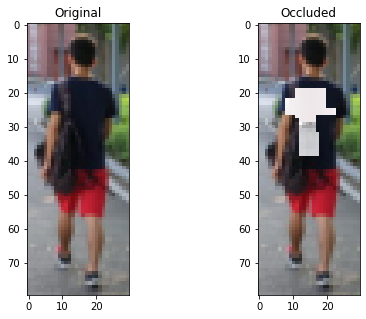

902


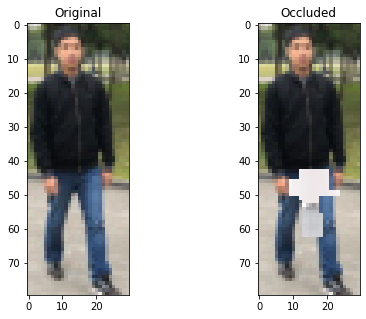

903


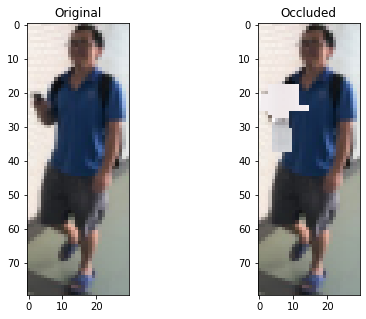

904


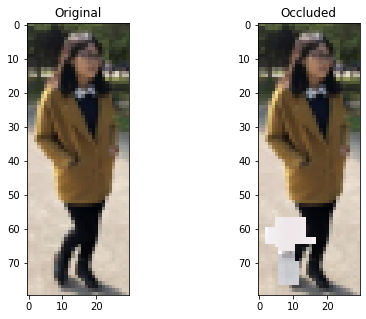

905


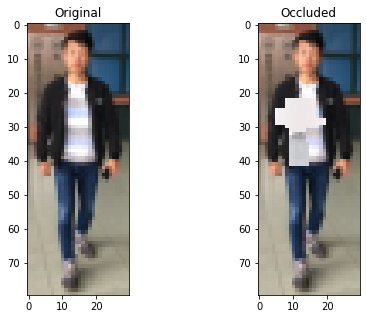

906


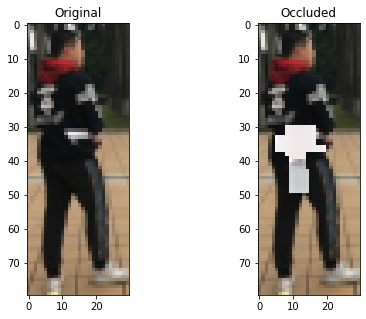

907


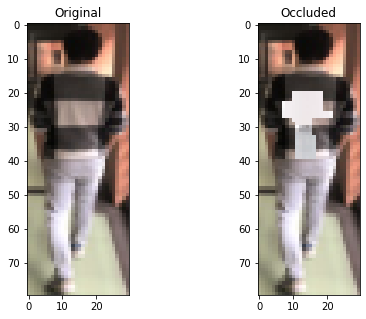

908


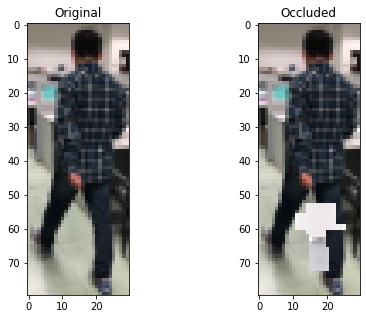

909


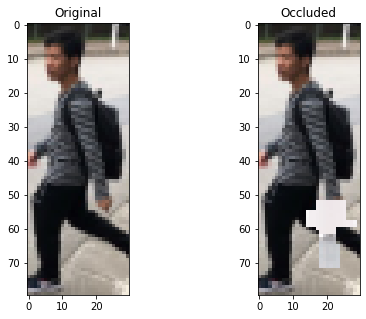

910


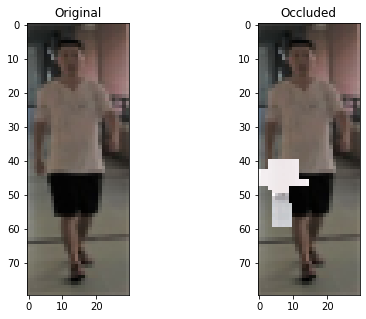

911


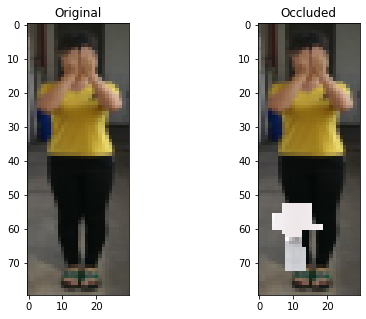

912


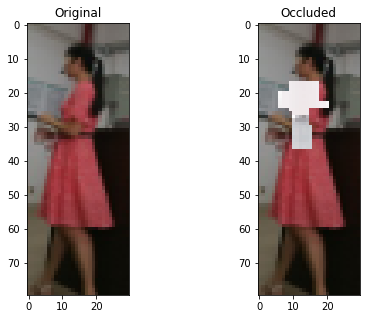

913


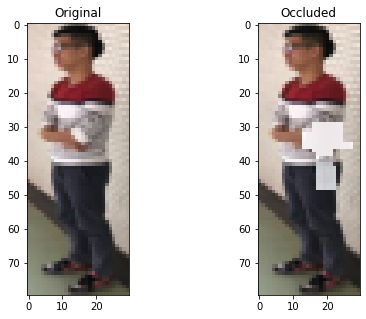

914


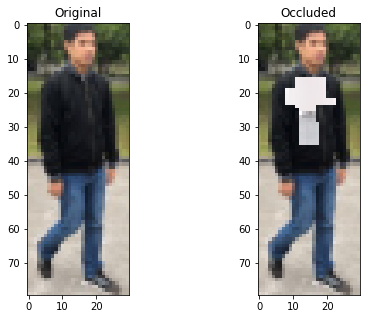

915


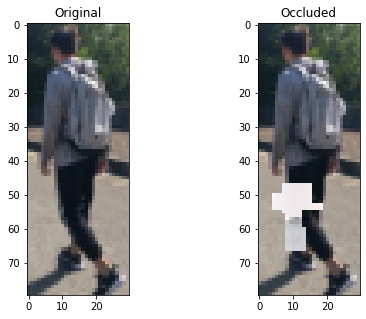

916


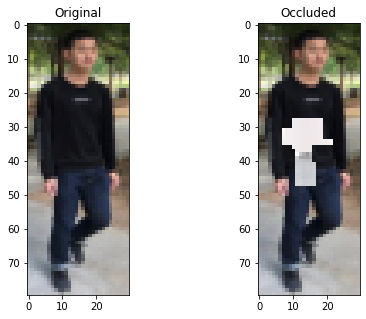

917


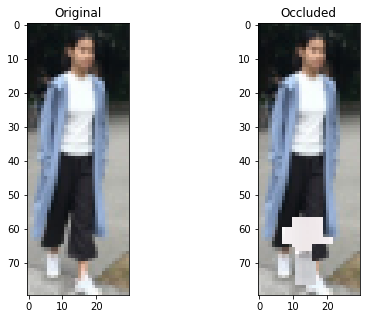

918


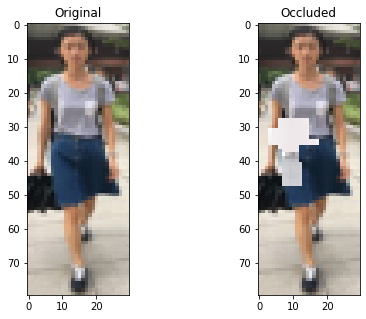

919


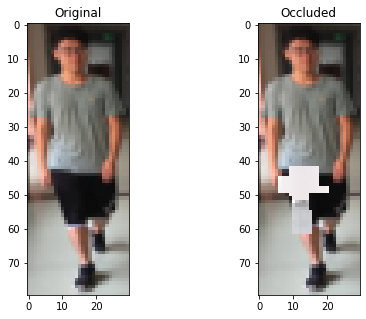

920


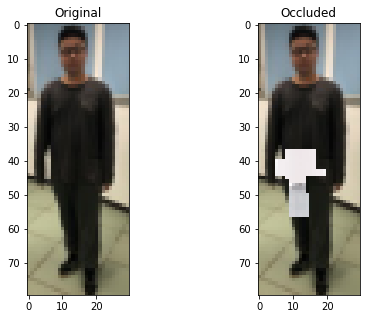

921


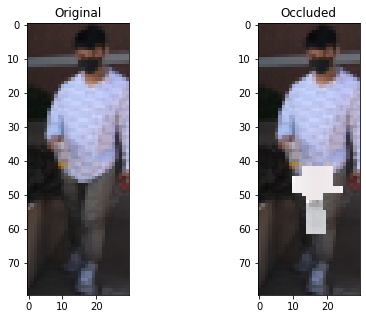

922


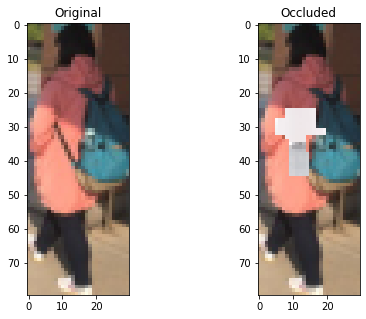

923


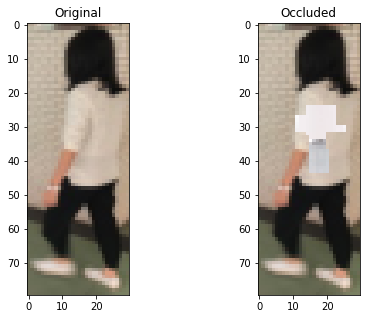

924


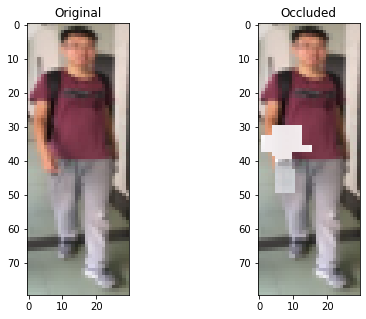

925


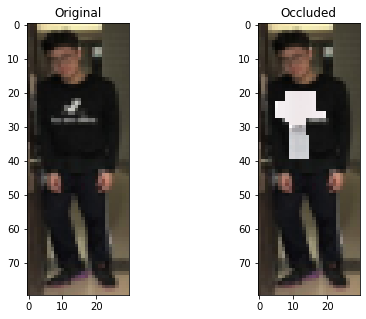

926


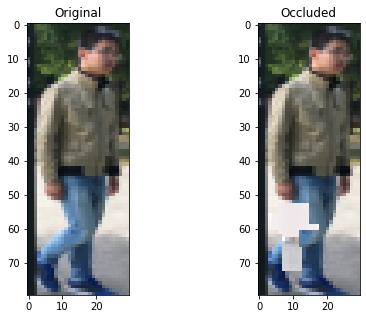

927


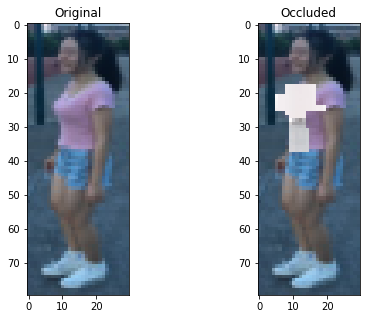

928


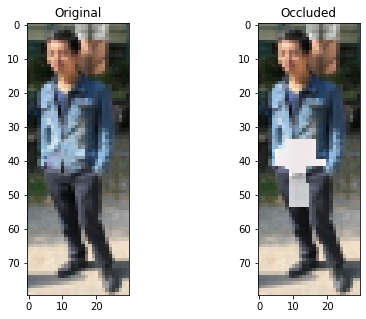

929


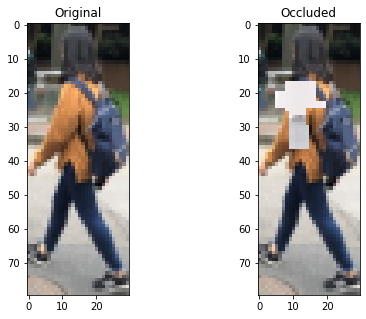

930


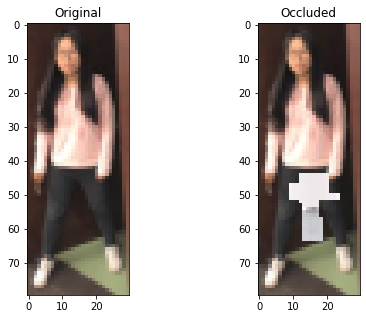

931


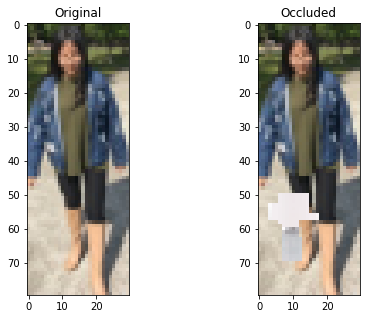

932


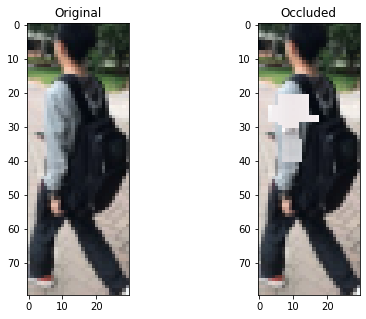

933


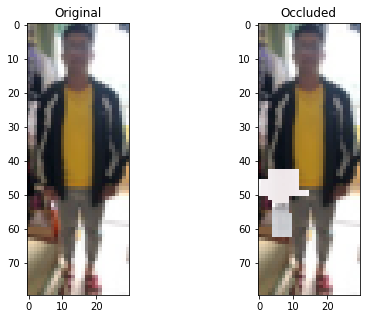

934


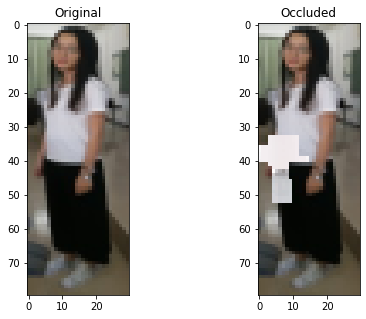

935


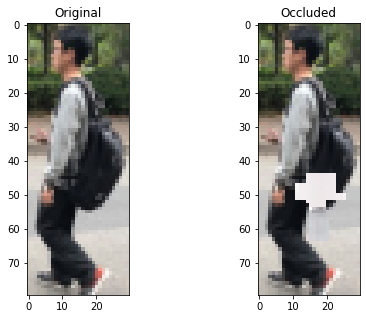

936


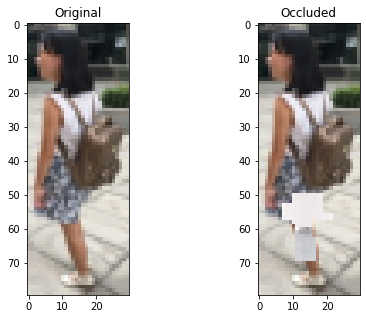

937


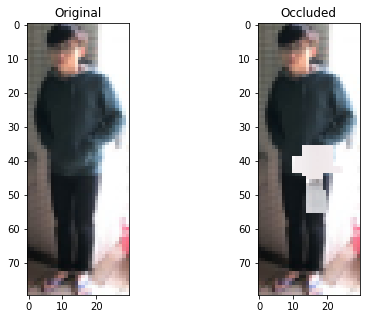

938


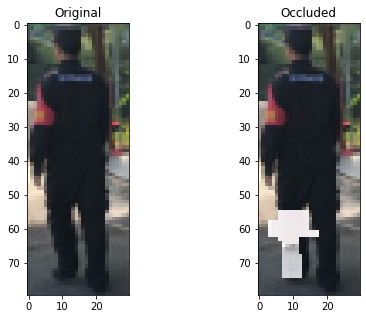

939


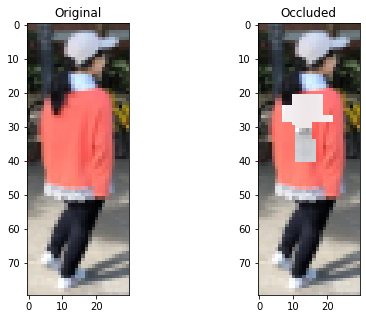

940


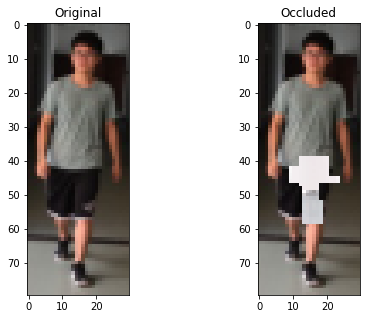

941


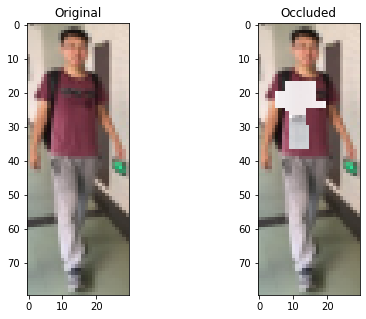

942


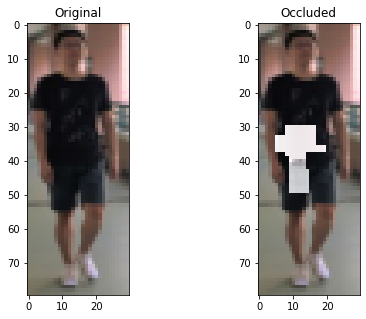

943


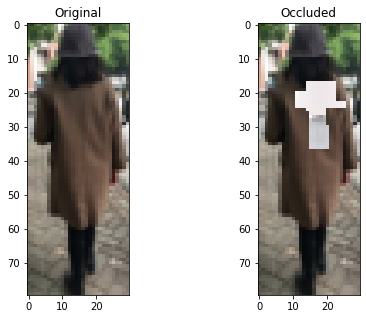

944


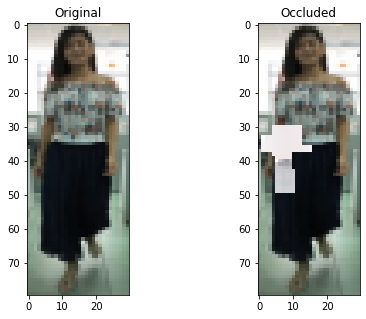

945


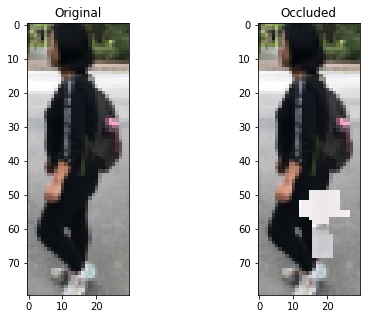

946


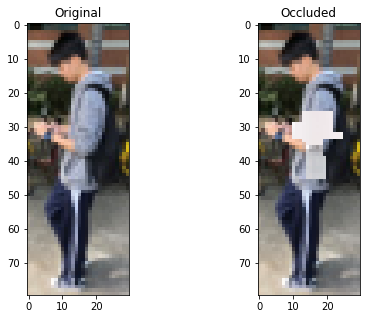

947


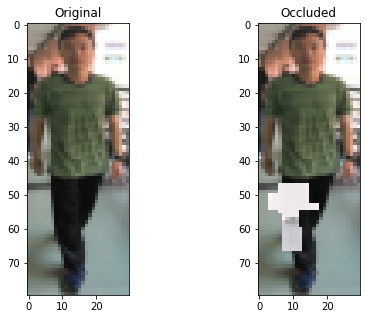

948


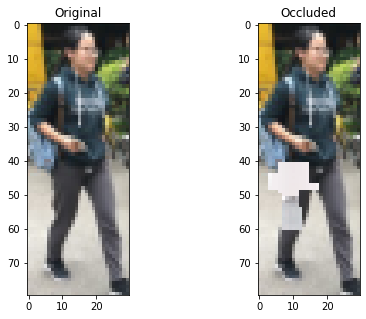

949


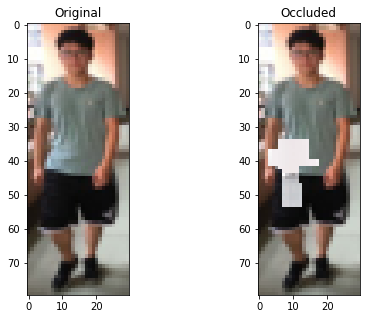

950


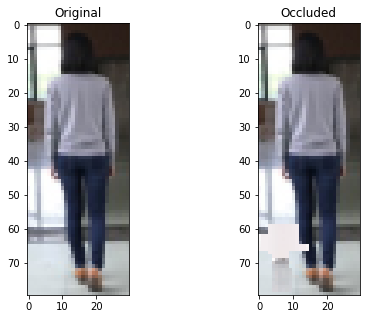

951


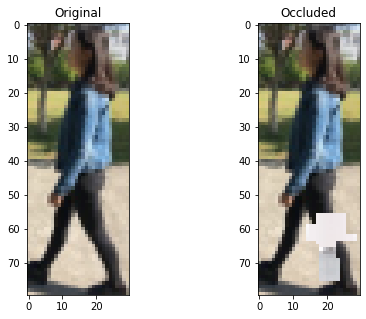

952


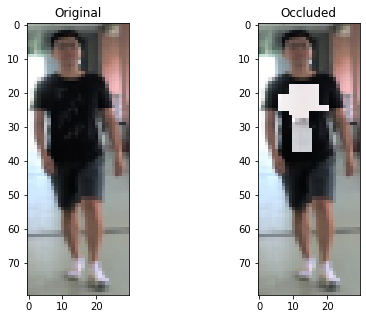

953


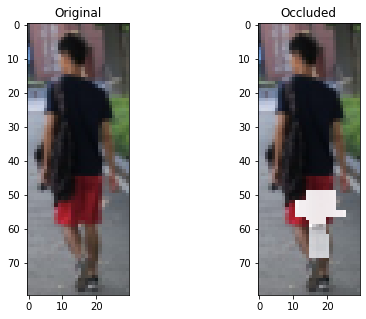

954


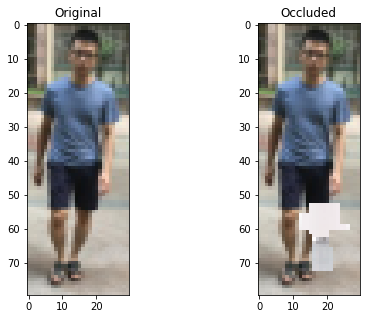

955


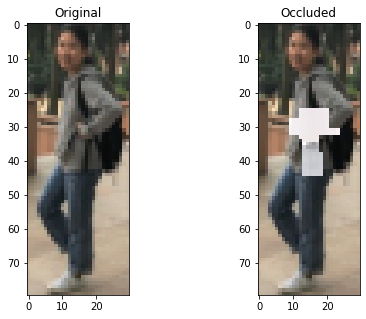

956


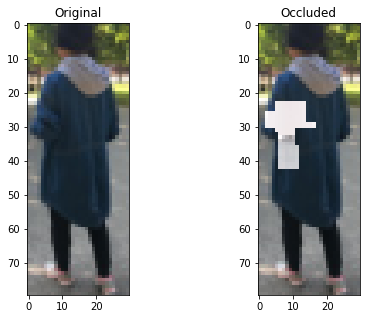

957


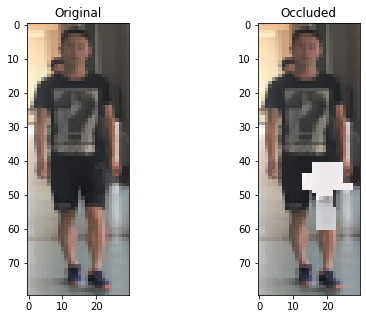

958


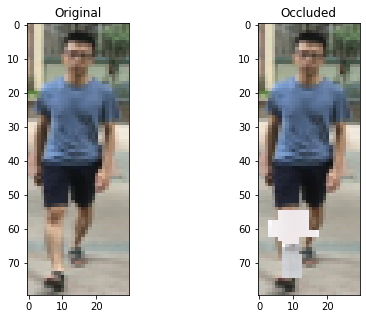

959


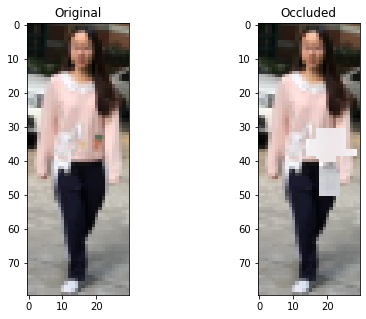

960


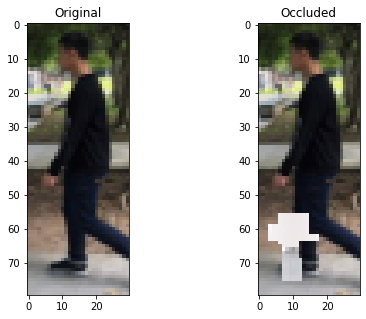

961


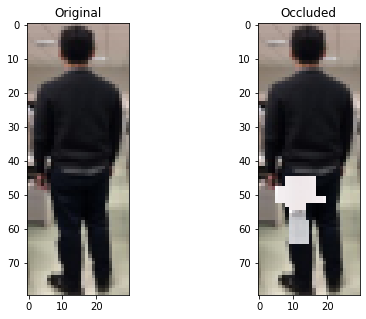

962


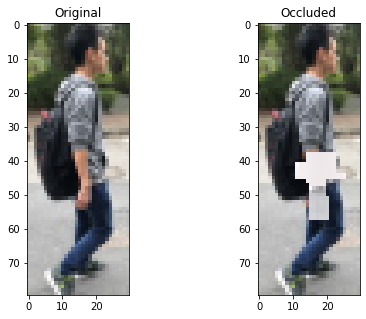

963


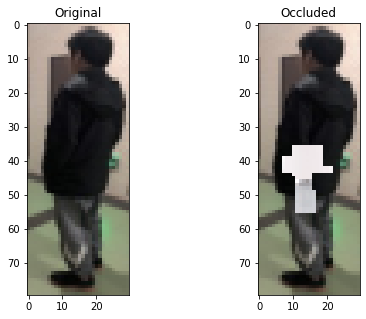

964


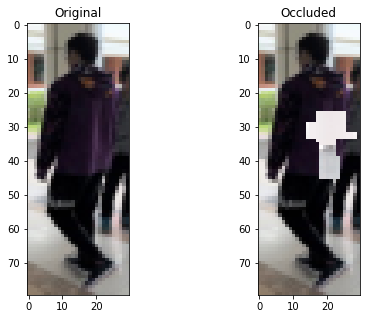

965


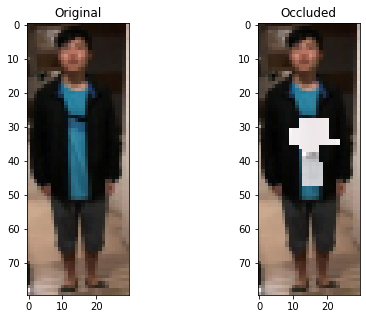

966


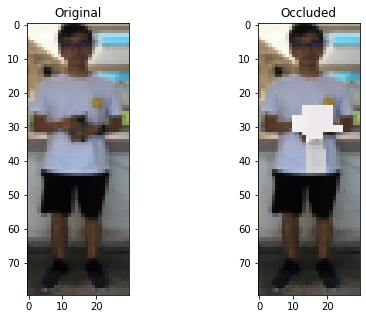

967


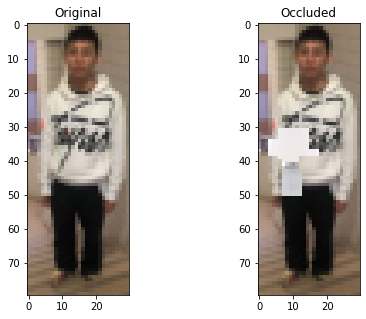

968


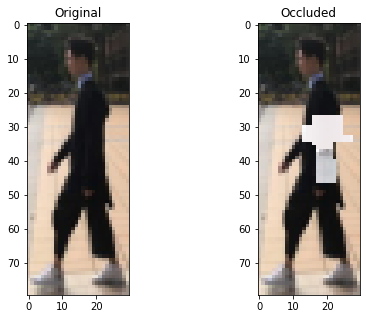

969


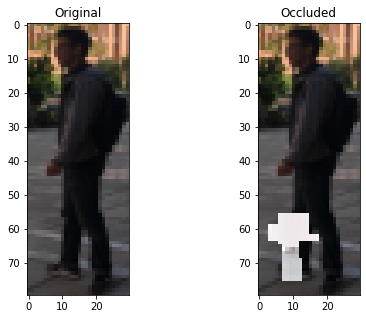

970


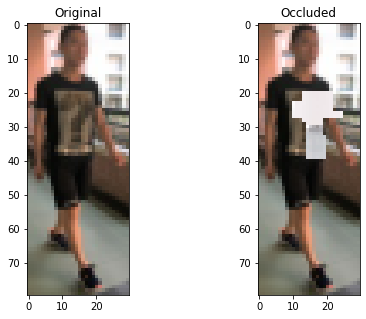

971


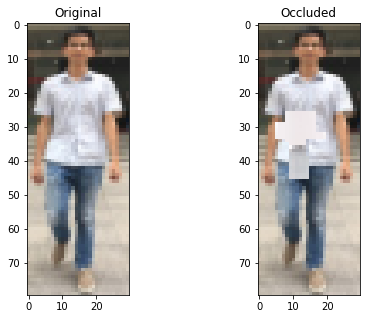

972


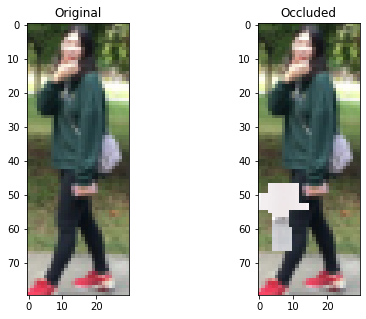

973


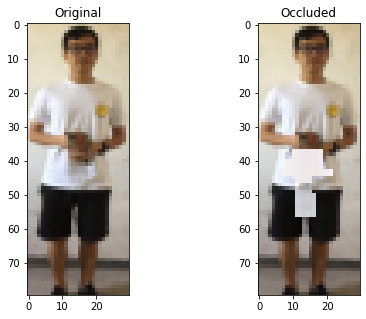

974


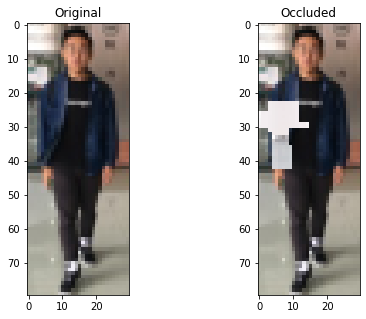

975


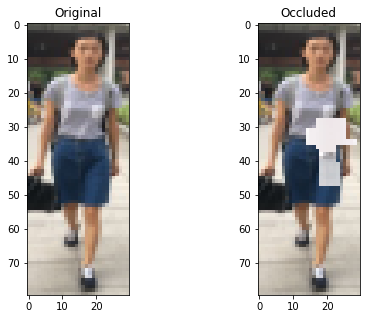

976


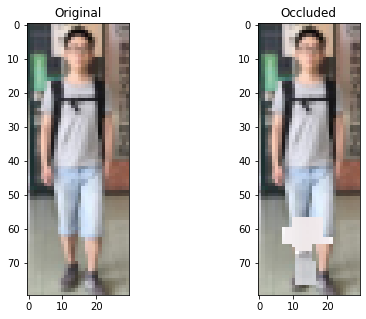

977


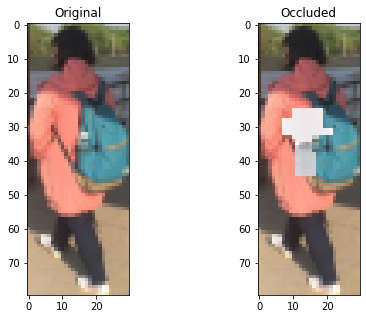

978


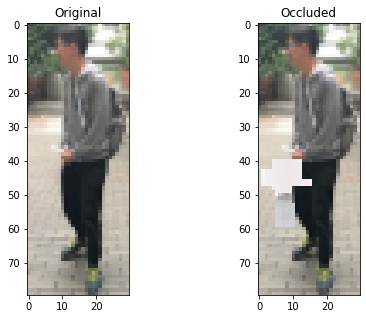

979


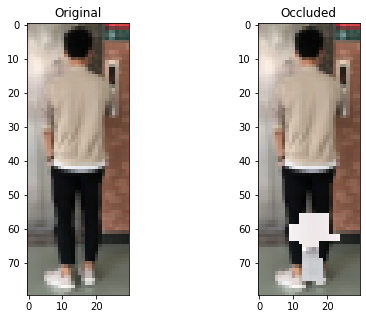

980


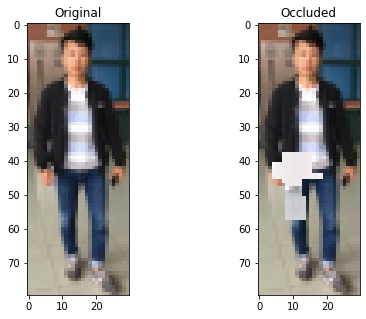

981


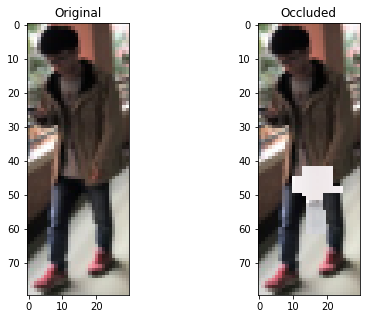

982


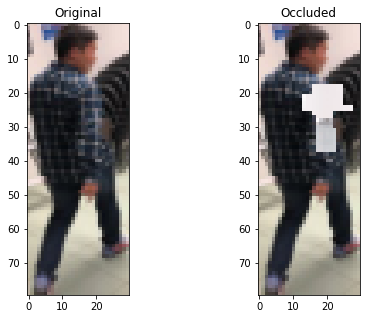

983


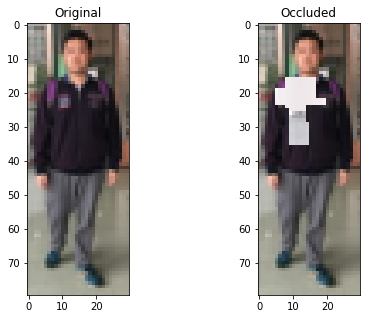

984


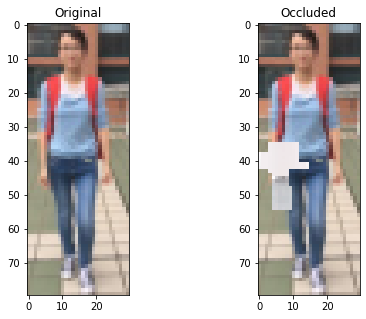

985


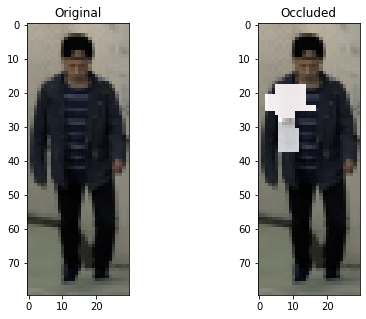

986


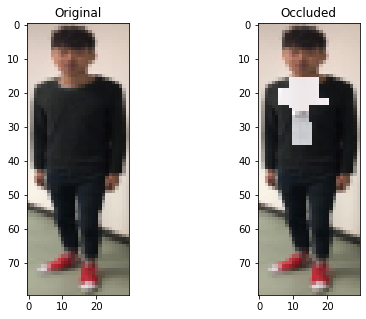

987


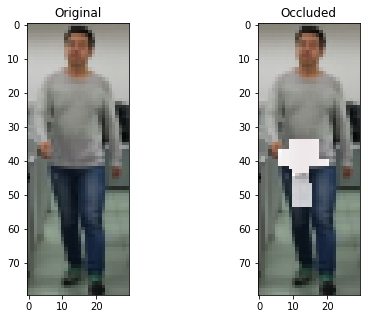

988


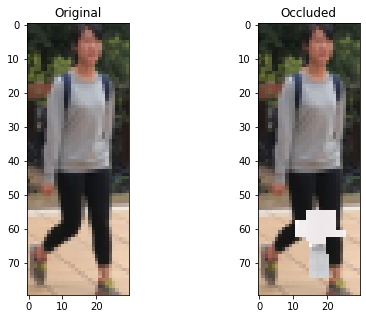

989


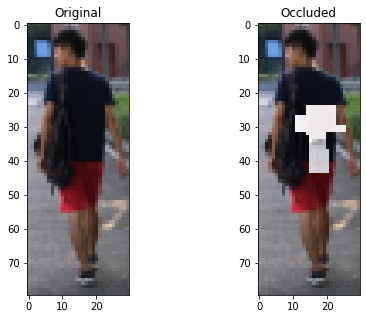

990


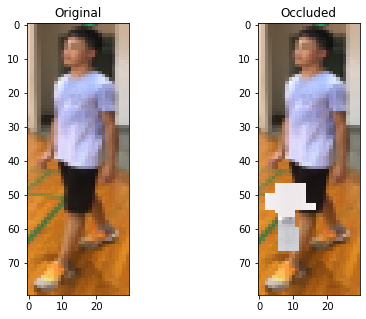

991


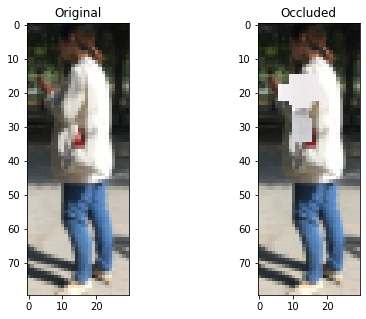

992


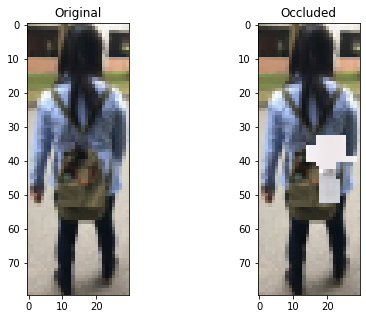

993


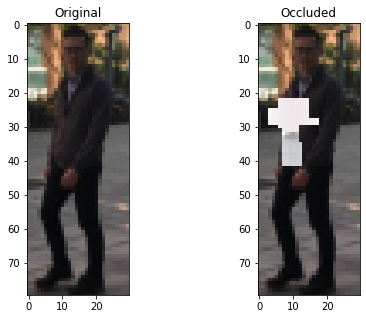

994


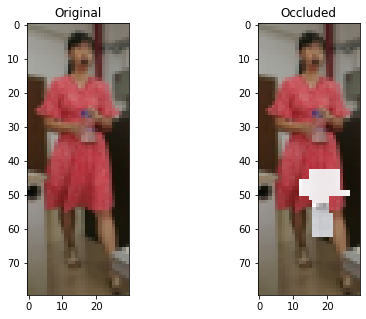

995


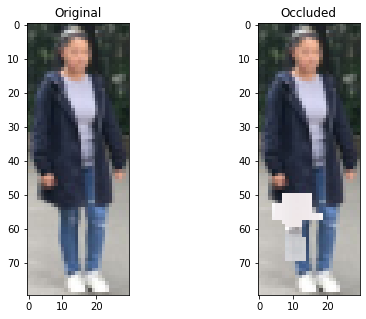

996


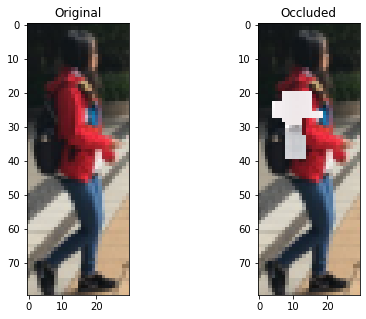

997


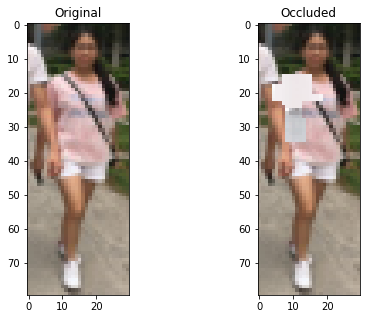

998


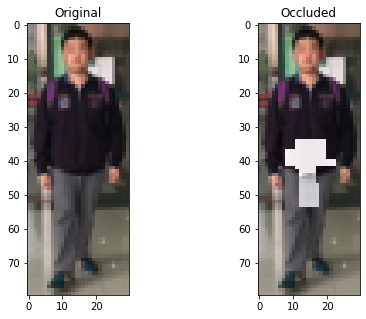

999


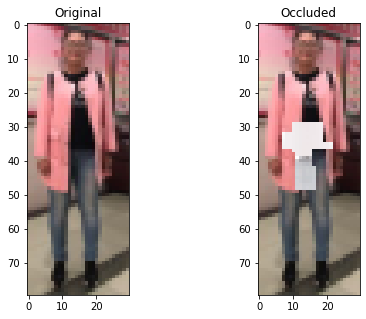

1000


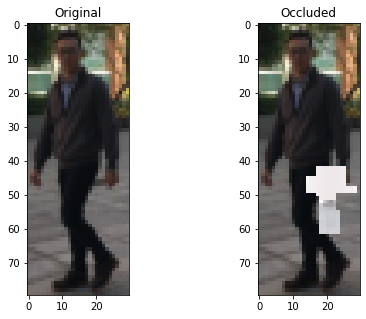

In [ ]:
occ = data.copy()
for im in range(900, 1000):
  img=occ[im]
  name=lis[im]
  if c==1000:
    print('done')
    break
  c+=1
  print(c)
  

  s_img = cv2.imread(p)[:,:,::-1]
  s_img=s_img[55:540, 120:480]
  s_img = image_resize(s_img, width = 15)
  #s_img = image_resize(s_img, height = 30)
  #plt.imshow(s_img)
  l_img = img.copy()
  mask = cv2.imread('/content/mask.jpg')
  mask=mask[55:540, 120:480]
  mask = image_resize(mask, width = 15)
  #mask = image_resize(mask, height = 30)
  kernel = np.ones((3,3),np.uint8)
  mask = cv2.erode(mask, kernel,iterations = 2)

  #l_img[mask>0]=0 
  y_offset=random.choice(range(15, 60))
  x_offset=random.choice(range(0,15))
  l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]][mask>0] = 0
  #xx = l_img.copy()
  #xx[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]][mask>0] = -1
  l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] += s_img*(mask>0)

  #plt.imshow(l_img)
  #mask.shape


  v = np.array([img, l_img])
  cv2.imwrite(os.path.join('/content/drive/MyDrive/Final/1/G' , name), cv2.cvtColor(v[0],cv2.COLOR_BGR2RGB))
  cv2.imwrite(os.path.join('/content/drive/MyDrive/Final/1/O' , name), cv2.cvtColor(v[1],cv2.COLOR_BGR2RGB))
  plt.figure(figsize=(20,5))
  plt.subplot(1,5,1),plt.imshow(v[0]),plt.title("Original")
  plt.subplot(1,5,2),plt.imshow(v[1]),plt.title("Occluded")
  plt.show()

In [ ]:
ooo=np.array(ooo)
ooo.shape

(30, 2, 80, 30, 3)

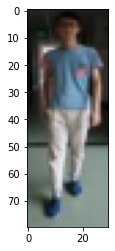

In [ ]:
plt.imshow(ooo[0][0])

In [ ]:
len(os.listdir('/content/drive/MyDrive/Dataset/Pre_data_fcase'))

699